In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [131]:
data=pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [132]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Target column is species.

In [133]:
X=data.drop(labels=['species'],axis=1)
y=data['species']
X.shape

(150, 4)

### Generating model for k=3

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [153]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print('Acuuracy:',accuracy_score(y_test,y_predict))

Acuuracy: 0.98


### Generating model for k=5

In [154]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_predict))

Accuracy: 0.98


### Generating model for k=7

In [155]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_predict))

Accuracy: 0.98


### Standardising X

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.33,random_state=0,stratify=y)

In [141]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_predict))

Accuracy: 0.98


In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
neighbors=list(range(1,50,2))
cv_scores=[]

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_scaled,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [144]:
cv_scores

[0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9533333333333334,
 0.96,
 0.9466666666666667,
 0.9400000000000001,
 0.9400000000000001,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9333333333333333,
 0.9133333333333333,
 0.9066666666666666,
 0.9,
 0.8933333333333333,
 0.8933333333333333,
 0.8933333333333333,
 0.8800000000000001,
 0.8733333333333334]

In [145]:
MSE=[1-x for x in cv_scores]
MSE

[0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.046666666666666634,
 0.053333333333333344,
 0.046666666666666634,
 0.040000000000000036,
 0.053333333333333344,
 0.05999999999999994,
 0.05999999999999994,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.053333333333333344,
 0.06666666666666665,
 0.08666666666666667,
 0.09333333333333338,
 0.09999999999999998,
 0.10666666666666669,
 0.10666666666666669,
 0.10666666666666669,
 0.11999999999999988,
 0.1266666666666666]

In [146]:
optimal_k=neighbors[MSE.index(min(MSE))]
#optimal_k=neighbors[cv_scores.index(max(cv_scores))]
optimal_k

15

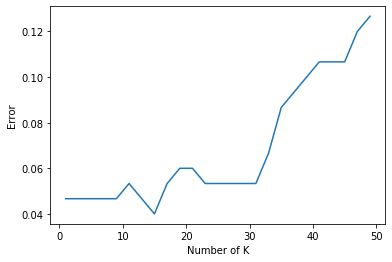

In [147]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of K')
plt.ylabel('Error')
plt.show()

In [148]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_predict))

Accuracy: 1.0
